# 1. BAM-file 

### Install IGV-notebook

In [ ]:
!pip install igv-notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00


### Download the files

In [ ]:
!wget -O sample.bam "https://docs.google.com/uc?export=download&id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&confirm=t"
!wget -O sample.bai "https://docs.google.com/uc?export=download&id=1alekgB02xKtUSI_X6Y2DfjK1BvzYIWfe&confirm=t"

--2023-05-15 16:28:27--  https://docs.google.com/uc?export=download&id=1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu&confirm=t
Resolving docs.google.com (docs.google.com)... 74.125.197.113, 74.125.197.139, 74.125.197.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/02cv6hsf5fb1n82cita1jns79bhmbas6/1684168050000/01446187118482740459/*/1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu?e=download&uuid=437f9aeb-3a3f-48db-be7d-4773574d5cda [following]
--2023-05-15 16:28:27--  https://doc-04-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/02cv6hsf5fb1n82cita1jns79bhmbas6/1684168050000/01446187118482740459/*/1EHtUHuISclLHKXGhjmn9pDKHYhSPc0uu?e=download&uuid=437f9aeb-3a3f-48db-be7d-4773574d5cda
Resolving doc-04-4g-docs.googleusercontent.com (doc-04-4g-docs.googleusercontent.com)... 173.194.203.132,

### Let's have a look at the .bam

In [ ]:
import igv_notebook

igv_notebook.init()

b = igv_notebook.Browser(
    {
        "genome": "hg38",
        "locus": "chr17"
    }
)


b.load_track(
    {
        "name": "Local BAM",
        "path": "/content/sample.bam",
        "indexPath": "/content/sample.bai",
        "format": "bam",
        "type": "alignment"
    })


b.zoom_in()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.1 Find reads mapped on the TP53 gene [5]

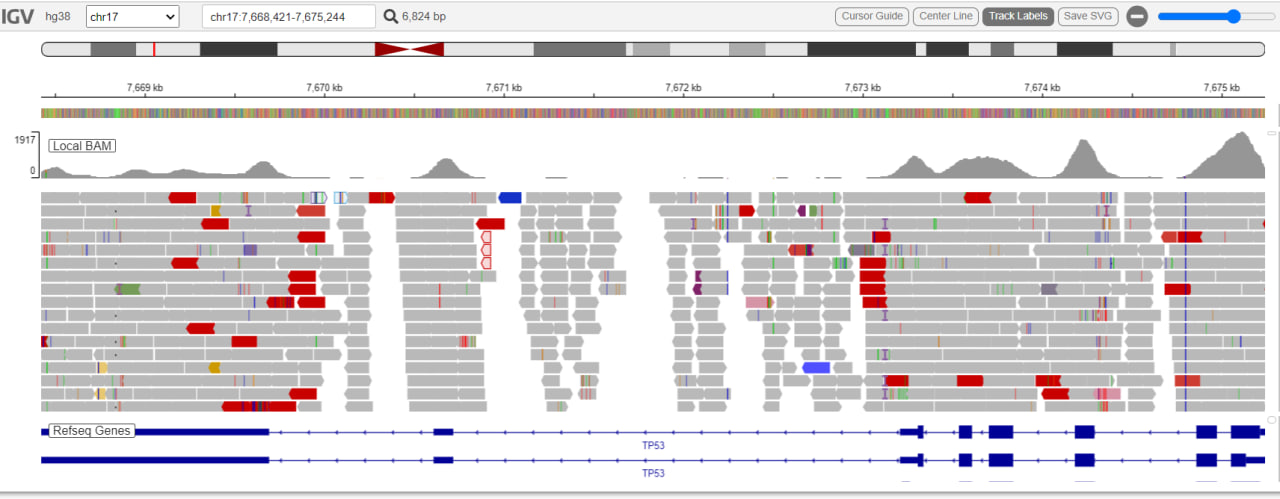

## 1.2 Speculate about the drastic difference in coverages of different parts of the TP53 gene [6]

Coverage describes the number of sequencing reads that are uniqely mapped to a reference and cover a known part of the genome. In reality, coverage is not uniform and may be underrepresented in genetic regions of interest due to a variety of factors. These include the fact that the genome itself is complex, containing genes, noncoding DNA, repetitive sequences, and other elements that can make it difficult to align the sequencing read to the proper genomic coordinates.

Reasons for drastic difference in coverages:
1. Degraded samples. They are more difficult to prepare with shorter sequencing reads. Shorter sequencing reads are more difficult to map to the correct region since they may be less unique.
2. Homologous regions have similar sequences.
3. Sequence reads with low complexity may be mapped to the wrong part of the genome, resulting in coverage bias.
4. Hypervariable regions. Due to the high number of variants, the sequencing read will look very different compared to the reference genome and may not be mapped appropriately.
5. GC content. Potential bias due to the % content of guanine-cytosine nucleotides




## 1.3 View reads as pairs [5]

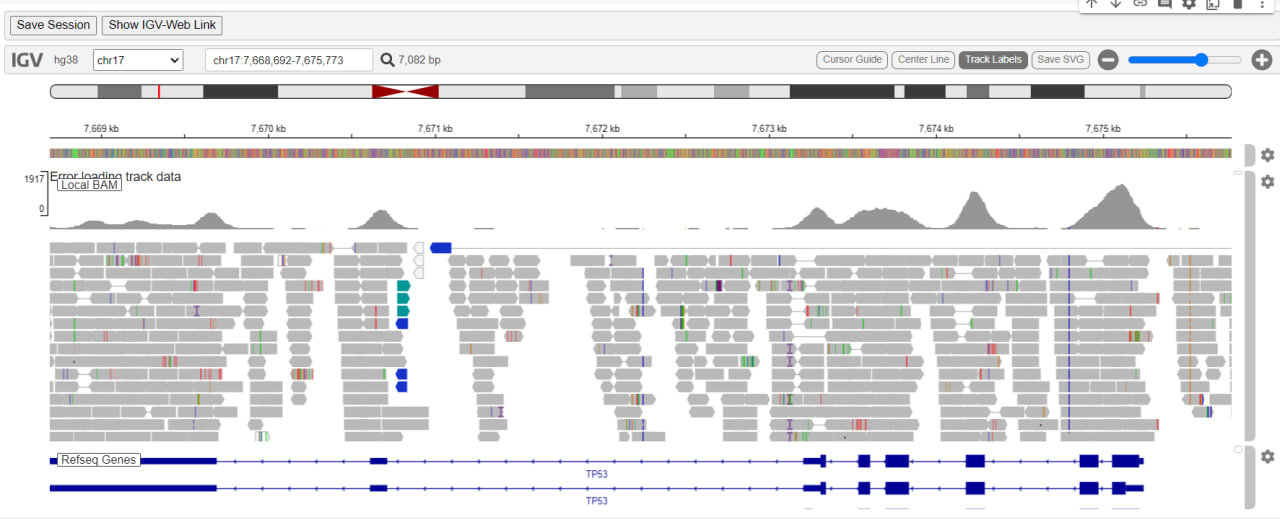***Insert a screenshot here***

## 1.4 Explain what do you see with the default color settings (by pair orientation & insert size) [10]

1. We can see many blank white places. No reads have beem mapped to these regions.
2. Reads that are colored red have larger than expected inferred sizes, and indicate possible deletions. 
3. Reads that are colored blue have smaller than expected inferred sizes, and indicate insertions.
4. Different colors are related to paired end reads that are coded by the chromosome on which their mates can be found. For example, clicking on magenta color block here we see mate chromosome 8 where mates can be found
5. Also very colorful reads tell us that they may have been mapped incorrectly and have lower quality.


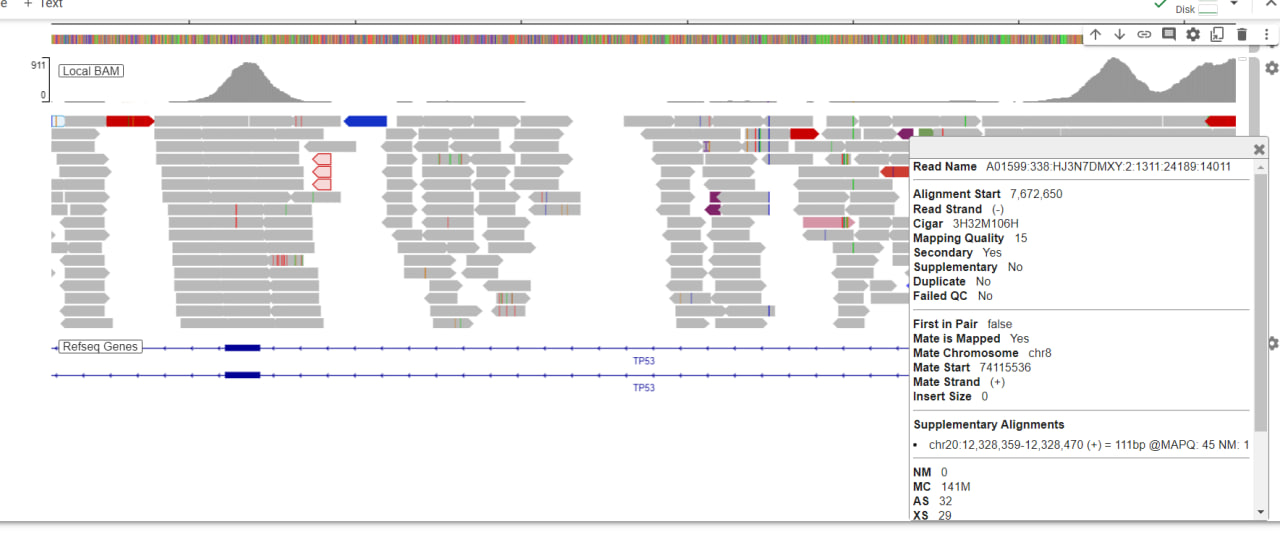

## 1.5 Find a position with a potentional germline variant [10]

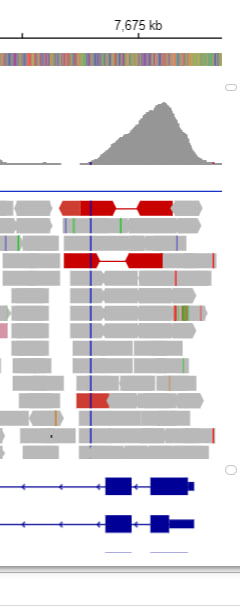

Genomic position of potential germline mutation - 7,674,797. It can be found in a big amount of reads and differs from refseq. Variations present in multiple reads at the same genomic position.

# 2. Variant calling

### Install bcftools with conda

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-05-15 16:32:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   167MB/s    in 0.5s    

2023-05-15 16:32:31 (167 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
!conda install -c bioconda samtools bcftools -y

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bcftools
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    bcftools-1.9               |       ha228f0b_4         807 KB  bioconda
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    c-ares-1.19.0              |       h5eee18b_0         118 KB
    ca-certificates-2023.01.10 |       h06a4308_0         120 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    curl-7.88.1   

### Make sure that everything is set up properly 

In [ ]:
!bcftools --help


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
Version: 1.9 (using htslib 1.9)

Usage:   bcftools [--version|--version-only] [--help] <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    sort         sort VCF/BCF file
    view         VCF/BCF conversion, view, subset and filter VCF/BCF files

 -- VCF/BCF analysis
    call         SNP/indel calling
    consensus    create consensus seq

### Download hg38

In [ ]:
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!gunzip hg38.fa.gz

--2023-05-15 16:35:03--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  67.4MB/s    in 13s     

2023-05-15 16:35:16 (73.1 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]



## 2.1 Extract TP53 gene from the sample.bam file [6]

In [ ]:
tp53_coordinates = "chr17\t7668421\t7675244"

with open("tp53.bed", "w") as bed_file:
    bed_file.write(tp53_coordinates)

In [ ]:
!samtools view -b -L tp53.bed sample.bam > tp53.bam

In [ ]:
!samtools index tp53.bam

## 2.2 Perform variant calling within TP53 gene [1]

In [ ]:
!bcftools mpileup --max-depth 10000 -Ou -f hg38.fa tp53.bam | bcftools call -mv -Ov -o calls.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files


### Read vcf with pandas 

In [ ]:
import pandas as pd 


pd.options.display.max_rows = 100
df = pd.read_table('calls.vcf', comment='#', header=None)
df.columns = ['CHROM',	'POS',	'ID',	'REF',	'ALT',	'QUAL',	'FILTER',	'INFO',	'FORMAT',	'TUMOR']
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR
0,chr17,7668450,.,G,A,222.00000,.,DP=331;VDB=9.09636e-11;SGB=-0.693147;RPB=0.785...,GT:PL,"0/1:255,0,255"
1,chr17,7669952,.,G,A,9.78026,.,DP=35;VDB=0.02;SGB=-0.453602;RPB=0.5;MQB=1;MQS...,GT:PL,"0/1:46,0,255"
2,chr17,7672182,.,A,G,22.15260,.,DP=28;VDB=0.02;SGB=-0.453602;RPB=0.285714;MQB=...,GT:PL,"0/1:58,0,255"
3,chr17,7672205,.,C,T,25.51080,.,DP=24;VDB=0.02;SGB=-0.453602;RPB=0.307692;MQB=...,GT:PL,"0/1:61,0,255"
4,chr17,7672218,.,T,C,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
5,chr17,7672219,.,G,A,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255"
6,chr17,7672246,.,T,C,225.00000,.,DP=14;VDB=0.10512;SGB=-0.651104;MQSB=0.600535;...,GT:PL,"1/1:255,24,0"
7,chr17,7672502,.,G,A,30.40970,.,DP=17;VDB=0.8;SGB=-0.453602;RPB=0.785714;MQB=1...,GT:PL,"0/1:65,0,253"
8,chr17,7674645,.,C,G,4.55923,.,DP=42;VDB=0.02;SGB=-0.453602;RPB=0.909091;MQB=...,GT:PL,"0/1:40,0,255"
9,chr17,7674797,.,T,C,225.00000,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0"


## 2.3 Describe what you see. [10]

There are 11 interesting variants within TP53 gene.
1. We work with chromosome 17
2. POS - position of variant in chromosome
2. No known variant IDs found
3. REF - reference sequence at the specific position
4. ALT - alternative sequence at the specific position. What we found out as a result of sequencing of our sample
5. QUAL - quality of variant
6. FILTER - provides information about whether a variant passes or fails certain predefined quality filters. If the variant passes all quality filters, the "FILTER" field is typically left empty or set to "PASS". In our case it is empty.
7. INFO - additional information about variants. 
8. FORMAT - format of individual genotypes. The GT in the FORMAT column tells us to expect genotypes. PL refers to Phred-scaled genotype likelihoods. The most likely genotype has a PL value of 0.
9. TUMOR - individual genotype information defined by FORMAT. For example, 0/1	means that the sample is heterozygous (carries both reference and alternate alleles). 1/1 - the sample is a homozygous alternate. The numbers after ":" PL genotypes likelihoods. Normalizing the values across all genotypes we make the PL value of the most likely genotype is 0, we do it by subtracting the value of the lowest PL from all the values. For example, in the first line at the position 7668450 we see PL: 255, 0, 255. They refer to genotypes GG, GA, AA. PL value of GA is 0, that means the sample is heterozygous with GT = 0/1.

## 2.4 Read about any 5 parameters from the INFO field and write an explanation what do they mean. [10]

In [ ]:
df.at[0, 'INFO']

'DP=331;VDB=9.09636e-11;SGB=-0.693147;RPB=0.785534;MQB=1;MQSB=1;BQB=0.972293;MQ0F=0;ICB=1;HOB=0.5;AC=1;AN=2;DP4=66,3,112,10;MQ=60'

1. DP - deepth of coverage - number of reads that cover specific region of gene. There are 331 reads that have been uniqely mapped.
2. MQ refers to the root mean square (RMS) mapping quality of all the reads spanning the given variant site. MQ represents the square root of the mean of squares of mapping qualities of all the reads at a given variant site.
The MQ >= 60 represents the good mapping quality.
3. RPB - Read Position Bias - refers to the tail distance bias between reference and alternate allele by the mapped reads. Most of the time, the end of the sequences constitutes sequencing errors, and therefore the alleles present at the end of sequences may not be right. RPB > 2 and < -2 (p < 0.05) indicate significant bias. RPB value close to zero is ideal (p > 0.05). The bigger p value is better. RPB=0.785534 is close to zero. It is good, the alleles at the end are right.
4. MQB - Mapping Quality Bias between the reads supporting reference and alternate allele. MQB reports the p values from the Mann-Whitney U test. If p < 0.05, it suggests there is significant bias i.e. the reads supporting alternate allele have lower mapping quality than reads supporting reference allele. The bigger p value is better. MQB=1, which is > 0.05. The reads supporting alternate allele have good mapping quality, the quality is not lower than quality from reads supporting reference allele.
5. AC - Alternate allele count - total alternate allele count for all possible genotypes. AC = 1 - one alternate allele.



## 2.5 Draw distributions of DP and MQ parameters from the INFO field. [10]

In [ ]:
dp_values =[]
mq_values = []
pos_values = []

for positions in df['POS']:
  pos_values.append(positions)

for params in df['INFO']:
  param_seps = params.split(";")
  
  for values in param_seps:
    if values.startswith("DP="):
      dp_values.append(values.split('=')[1])
    elif values.startswith("MQ="):
      mq_values.append(values.split('=')[1])

print("DP:", dp_values)
print("MQ:", mq_values)
print("Positions:", pos_values)

DP: ['331', '35', '28', '24', '23', '23', '14', '17', '42', '76', '42']
MQ: ['60', '60', '59', '59', '59', '59', '59', '60', '60', '59', '60']
Positions: [7668450, 7669952, 7672182, 7672205, 7672218, 7672219, 7672246, 7672502, 7674645, 7674797, 7675327]


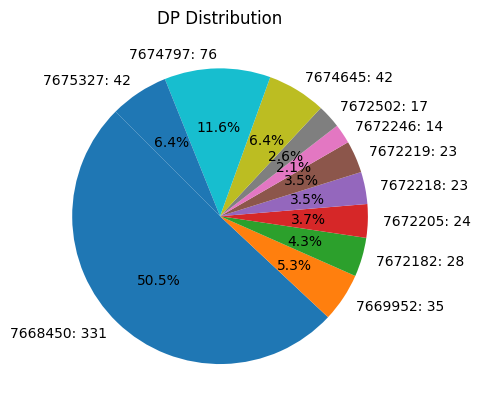

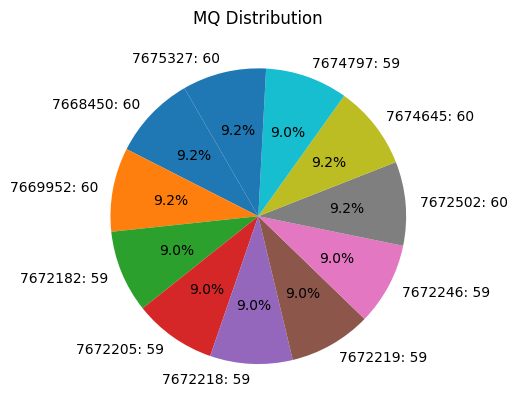

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(dp_values, labels=[f'{pos}: {val}' for pos, val in zip(pos_values, dp_values)], startangle=135, autopct='%1.1f%%')
ax.set_title('DP Distribution')

fig, ax = plt.subplots()
ax.pie(mq_values, labels=[f'{pos}: {val}' for pos, val in zip(pos_values, mq_values)], startangle=120, autopct='%1.1f%%')
ax.set_title('MQ Distribution')

plt.show()


## 2.6 Propose thresholds for the parameters from the task 2.5 and perform variant filtering using them. Write an explanation for these thresholds. How many variants were filtered out? [25]

In [ ]:
df['DP'] = dp_values
df['MQ'] = mq_values
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR,DP,MQ
0,chr17,7668450,.,G,A,222.00000,.,DP=331;VDB=9.09636e-11;SGB=-0.693147;RPB=0.785...,GT:PL,"0/1:255,0,255",331,60
1,chr17,7669952,.,G,A,9.78026,.,DP=35;VDB=0.02;SGB=-0.453602;RPB=0.5;MQB=1;MQS...,GT:PL,"0/1:46,0,255",35,60
2,chr17,7672182,.,A,G,22.15260,.,DP=28;VDB=0.02;SGB=-0.453602;RPB=0.285714;MQB=...,GT:PL,"0/1:58,0,255",28,59
3,chr17,7672205,.,C,T,25.51080,.,DP=24;VDB=0.02;SGB=-0.453602;RPB=0.307692;MQB=...,GT:PL,"0/1:61,0,255",24,59
4,chr17,7672218,.,T,C,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255",23,59
5,chr17,7672219,.,G,A,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255",23,59
6,chr17,7672246,.,T,C,225.00000,.,DP=14;VDB=0.10512;SGB=-0.651104;MQSB=0.600535;...,GT:PL,"1/1:255,24,0",14,59
7,chr17,7672502,.,G,A,30.40970,.,DP=17;VDB=0.8;SGB=-0.453602;RPB=0.785714;MQB=1...,GT:PL,"0/1:65,0,253",17,60
8,chr17,7674645,.,C,G,4.55923,.,DP=42;VDB=0.02;SGB=-0.453602;RPB=0.909091;MQB=...,GT:PL,"0/1:40,0,255",42,60
9,chr17,7674797,.,T,C,225.00000,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0",76,59


In [ ]:
filtered_df = df[df['MQ'].astype(int) >= 50]
filtered_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR,DP,MQ
0,chr17,7668450,.,G,A,222.00000,.,DP=331;VDB=9.09636e-11;SGB=-0.693147;RPB=0.785...,GT:PL,"0/1:255,0,255",331,60
1,chr17,7669952,.,G,A,9.78026,.,DP=35;VDB=0.02;SGB=-0.453602;RPB=0.5;MQB=1;MQS...,GT:PL,"0/1:46,0,255",35,60
2,chr17,7672182,.,A,G,22.15260,.,DP=28;VDB=0.02;SGB=-0.453602;RPB=0.285714;MQB=...,GT:PL,"0/1:58,0,255",28,59
3,chr17,7672205,.,C,T,25.51080,.,DP=24;VDB=0.02;SGB=-0.453602;RPB=0.307692;MQB=...,GT:PL,"0/1:61,0,255",24,59
4,chr17,7672218,.,T,C,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255",23,59
5,chr17,7672219,.,G,A,28.74160,.,DP=23;VDB=0.02;SGB=-0.453602;RPB=0.333333;MQB=...,GT:PL,"0/1:64,0,255",23,59
6,chr17,7672246,.,T,C,225.00000,.,DP=14;VDB=0.10512;SGB=-0.651104;MQSB=0.600535;...,GT:PL,"1/1:255,24,0",14,59
7,chr17,7672502,.,G,A,30.40970,.,DP=17;VDB=0.8;SGB=-0.453602;RPB=0.785714;MQB=1...,GT:PL,"0/1:65,0,253",17,60
8,chr17,7674645,.,C,G,4.55923,.,DP=42;VDB=0.02;SGB=-0.453602;RPB=0.909091;MQB=...,GT:PL,"0/1:40,0,255",42,60
9,chr17,7674797,.,T,C,225.00000,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0",76,59


In [ ]:
rows_removed = df.shape[0] - filtered_df.shape[0]
print("Rows removed:", rows_removed)

Rows removed: 0


MQ refers to the root mean square (RMS) mapping quality of all the reads spanning the given variant site.
MQ represents the square root of the mean of squares of mapping qualities of all the reads at a given variant site.
The MQ >= 60 represents the good mapping quality. The variants with MQ < 50 should be removed. The choice of the threshold value for MQ is often based on common conventions or recommendations. I would filter out MQ values < 50. All values in my VCF within TP53 gene >= 50, so I would remain them all for the MQ parameter

I would filter out DP < 10. All values in my VCF within TP53 gene >= 10, so I would remain them all for the DP parameter.

## 2.6 Were you able to find the variant from the task 1.5? [2]

In [ ]:
df[df['POS'].astype(int) == 7674797]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TUMOR,DP,MQ
9,chr17,7674797,.,T,C,225.0,.,DP=76;VDB=3.41671e-08;SGB=-0.693147;MQ0F=0;AC=...,GT:PL,"1/1:255,178,0",76,59


Yes, I found the variant at the position 7674797. GT is 1/1 - a homozygous alternate 'CC'.

___